In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from IPython.display import Image

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [ ]:
# Directory to dataset in drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
model = tf.keras.applications.MobileNet()

In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
def prepare_image(file):
    img_path = '/content/gdrive/MyDrive/images/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [ ]:
Image(filename='/content/gdrive/MyDrive/images/pineapple.jpg', width=300,height=200) 

In [ ]:
preprocessed_image = prepare_image('pineapple.jpg')
predictions = model.predict(preprocessed_image)

In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07753275', 'pineapple', 0.9957295),
  ('n07745940', 'strawberry', 0.0007329515),
  ('n13133613', 'ear', 0.0006819719),
  ('n04522168', 'vase', 0.00056856684),
  ('n07714990', 'broccoli', 0.00034437078)]]

In [ ]:
Image(filename='/content/gdrive/MyDrive/images/car.png', width=300,height=200) 

In [ ]:
preprocessed_image = prepare_image('car.png')
predictions = model.predict(preprocessed_image)

In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04285008', 'sports_car', 0.5636984),
  ('n04037443', 'racer', 0.29768458),
  ('n02974003', 'car_wheel', 0.025644975),
  ('n03100240', 'convertible', 0.023541747),
  ('n03459775', 'grille', 0.022007767)]]

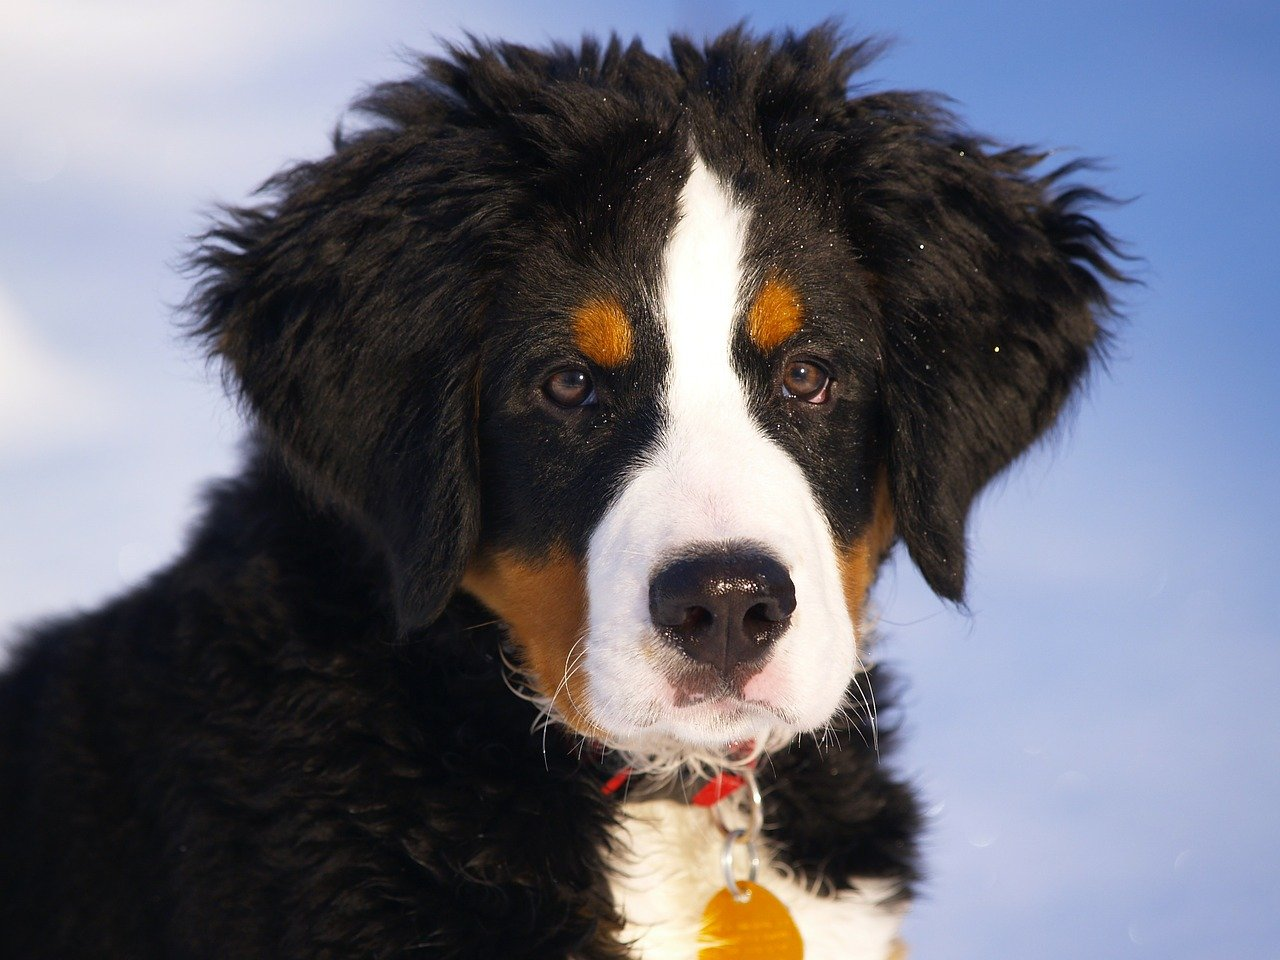

In [ ]:
Image(filename='/content/gdrive/MyDrive/images/dog.jpg', width=300,height=200) 

In [ ]:
preprocessed_image = prepare_image('dog.jpg')
predictions = model.predict(preprocessed_image)

In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02107683', 'Bernese_mountain_dog', 0.671265),
  ('n02107908', 'Appenzeller', 0.24208328),
  ('n02107574', 'Greater_Swiss_Mountain_dog', 0.067534074),
  ('n02108000', 'EntleBucher', 0.015557061),
  ('n02097474', 'Tibetan_terrier', 0.0015719568)]]